# GHCN data
## Averages
Checking averages

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2
import src.ghcn as ghcn

In [22]:
import numpy as np

In [4]:
%%time
avg_temp_df = ghcn.get_avg_temps(from_file="./../data/ghcn_temps.csv")

get all temps...
done.
taking avg...
done.
adding date fields...
done
CPU times: user 36.3 s, sys: 2.24 s, total: 38.5 s
Wall time: 38.5 s


In [5]:
%%time
avg_temp_df.to_csv("./../data/avg_ghcn_temps.csv", index=False)

CPU times: user 1.51 s, sys: 12.3 ms, total: 1.53 s
Wall time: 1.52 s


In [6]:
%%time
avg_temp_df = pd.read_csv("./../data/avg_ghcn_temps.csv")

CPU times: user 82.7 ms, sys: 0 ns, total: 82.7 ms
Wall time: 82.1 ms


In [7]:
len(avg_temp_df)

136618

In [8]:
avg_temp_df.head()

,date_dt,day,month,year,ELEMENT,temp_f
0,1833-01-02,2,1,1833,TMAX,29.48
1,1833-01-02,2,1,1833,TMIN,23.36
2,1833-01-03,3,1,1833,TMAX,26.42
3,1833-01-03,3,1,1833,TMIN,19.76
4,1833-01-04,4,1,1833,TMAX,24.98


In [9]:
%%time
avg_temp_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136618 entries, 0 to 136617
Data columns (total 6 columns):
date_dt    136618 non-null object
day        136618 non-null int64
month      136618 non-null int64
year       136618 non-null int64
ELEMENT    136618 non-null object
temp_f     136618 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 20.8 MB
CPU times: user 242 ms, sys: 162 µs, total: 242 ms
Wall time: 242 ms


In [10]:
for typ in ["min", "max"]:
    avg_temp_df["day_{}".format(typ)] = avg_temp_df.merge(
        right = avg_temp_df.groupby(
            ["month", "day", "ELEMENT"],
            as_index = False).agg(
            {"temp_f": typ}).rename(
            columns = {"temp_f": "temp_f_{}".format(typ)}),
        on = ["month", "day", "ELEMENT"],
        how = "left")["temp_f_{}".format(typ)]

In [11]:
avg_temp_df.head()

,date_dt,day,month,year,ELEMENT,temp_f,day_min,day_max
0,1833-01-02,2,1,1833,TMAX,29.48,16.379289,64.40
1,1833-01-02,2,1,1833,TMIN,23.36,-1.473165,48.32
2,1833-01-03,3,1,1833,TMAX,26.42,15.440000,60.74
3,1833-01-03,3,1,1833,TMIN,19.76,-3.124231,46.43
4,1833-01-04,4,1,1833,TMAX,24.98,15.384545,56.06


In [12]:
avg_temp_df["norm_temp_f"] = (avg_temp_df.temp_f - avg_temp_df.day_min)/(avg_temp_df.day_max - avg_temp_df.day_min)

In [13]:
avg_temp_df.head()

,date_dt,day,month,year,ELEMENT,temp_f,day_min,day_max,norm_temp_f
0,1833-01-02,2,1,1833,TMAX,29.48,16.379289,64.40,0.272814
1,1833-01-02,2,1,1833,TMIN,23.36,-1.473165,48.32,0.498726
2,1833-01-03,3,1,1833,TMAX,26.42,15.440000,60.74,0.242384
3,1833-01-03,3,1,1833,TMIN,19.76,-3.124231,46.43,0.461802
4,1833-01-04,4,1,1833,TMAX,24.98,15.384545,56.06,0.235903


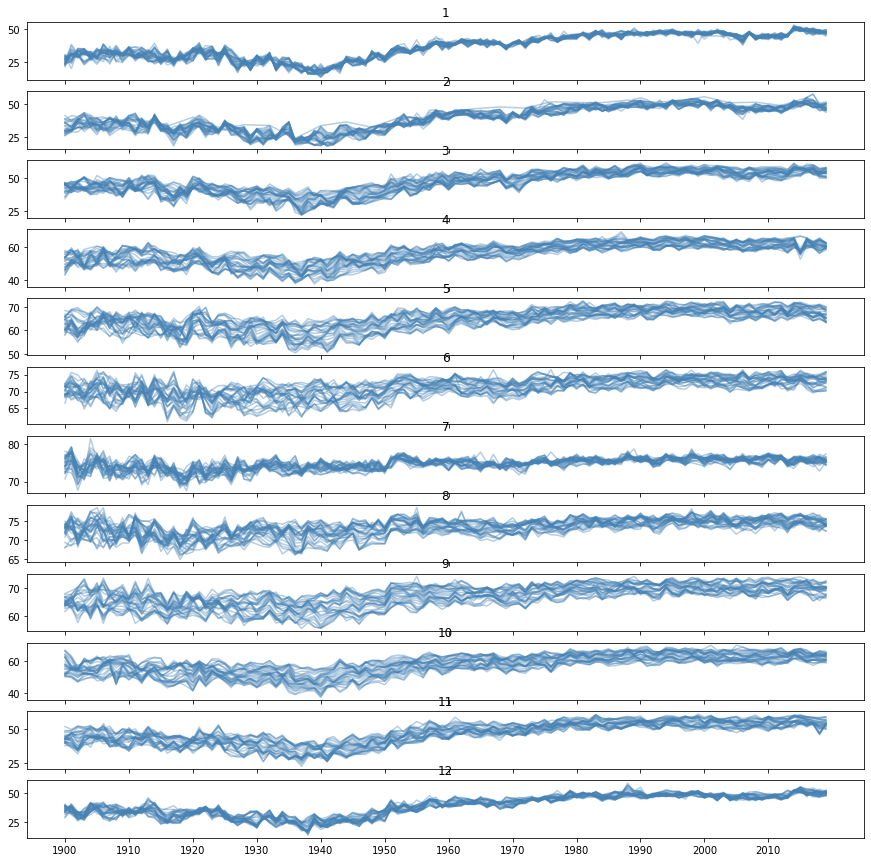

In [14]:
fig, ax = plt.subplots(figsize = (15, 15), nrows = 12, sharex = True)
element = "TMAX"
min_year = 1900
max_year = 2019
for month in avg_temp_df.month.unique():
    month_avg_temps = avg_temp_df[(avg_temp_df.month == month) & (avg_temp_df.ELEMENT == element) & (avg_temp_df.year >= min_year) & (avg_temp_df.year <= max_year)]
    for day in month_avg_temps.day.unique():
        month_day_avg_temps = month_avg_temps[month_avg_temps.day == day]
        ax[month - 1].plot(month_day_avg_temps.year, month_day_avg_temps.temp_f, color = "steelblue", alpha = 0.4)
    ax[month -1].set_title(month)
ax[0].set_xticks(range(1900, max_year + 1, 10));

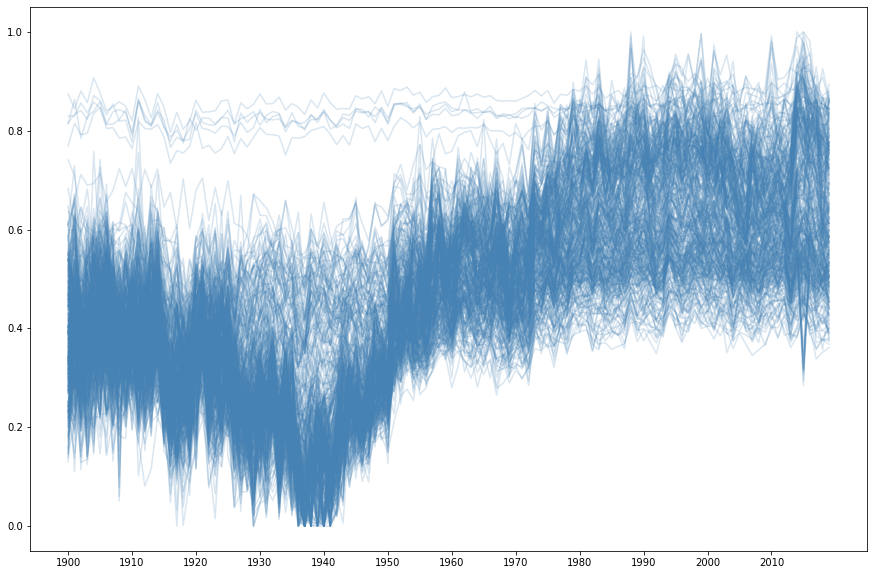

In [28]:
fig, ax = plt.subplots(figsize = (15, 10))
element = "TMAX"
min_year = 1900
max_year = 2019
for month_day in np.unique(avg_temp_df[["month", "day"]].values, axis = 0):
    month_day_avg_temps = avg_temp_df[
        (avg_temp_df.month == month_day[0]) &\
        (avg_temp_df.day == month_day[1]) &\
        (avg_temp_df.ELEMENT == element) &\
        (avg_temp_df.year >= min_year) &\
        (avg_temp_df.year <= max_year)]
    ax.plot(month_day_avg_temps.year, month_day_avg_temps.norm_temp_f, color = "steelblue", alpha = 0.2)
ax.set_xticks(range(1900, max_year + 1, 10));